# **PCA**







#Step 1 : import libraries

In [11]:
import pandas as pd
import numpy as np

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns


#Step 2 : Load dataset

In [12]:
# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame



In [13]:
# checking shape
print('Original Dataframe shape :',df.shape)


Original Dataframe shape : (569, 31)


In [14]:
# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape   :', X.shape)


Inputs Dataframe shape   : (569, 30)


Now we will apply the first most step which is to standardize the data and for that, we will have to first calculate the mean and standard deviation of each feature in the feature space.

**Remember that :**
**Standardization = (X - X_mean) / Stander deviation**


In [15]:
# Mean
X_mean = X.mean()


In [16]:
# Standard deviation
X_std = X.std()


In [17]:
# Standardization
Z = (X - X_mean) / X_std

# **covariance matrix**
The covariance matrix helps us visualize how strong the dependency of two features is with each other in the feature space.




In [18]:
c = Z.cov()

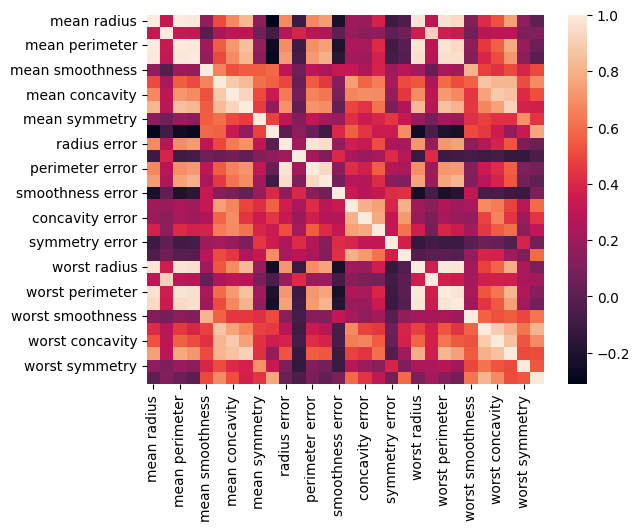

In [19]:
sns.heatmap(c)
plt.show()

# **Eigenvectors & Eigenvalues**

Now we will compute the eigenvectors and eigenvalues for our feature space which serve a great purpose in identifying the principal components for our feature space.




In [20]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


Sort the eigenvalues in descending order and sort the corresponding eigenvectors accordingly.




In [21]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]


Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.




In [22]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var


array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

# **Determine the Number of Principal Components**

Here we can either consider the number of principal components of any value of our choice or by limiting the explained variance. Here I am considering explained variance more than equal to 50%. Let’s check how many principal components come into this.




In [23]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components


2

#Project the Data onto the Selected Principal Components


*   Find the projection matrix, It is a matrix of eigenvectors corresponding to the largest eigenvalues of the covariance matrix of the data. it projects the high-dimensional dataset onto a lower-dimensional subspace

*   The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components.







In [24]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,index = cancer['feature_names'], columns = ['PC1','PC2'])


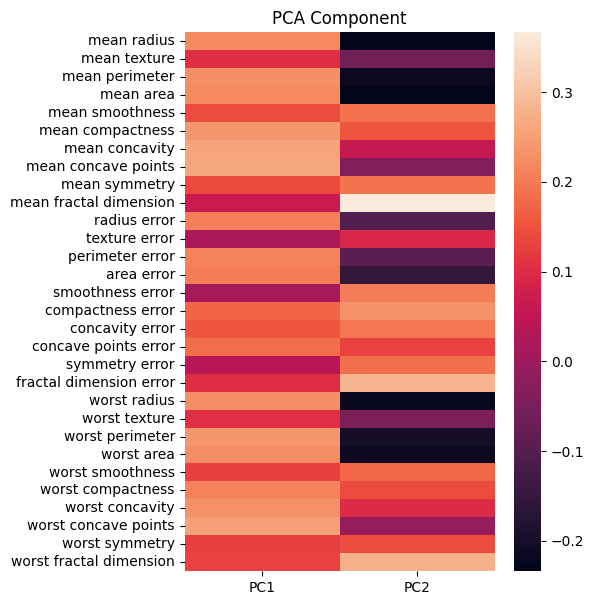

In [25]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()



Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.
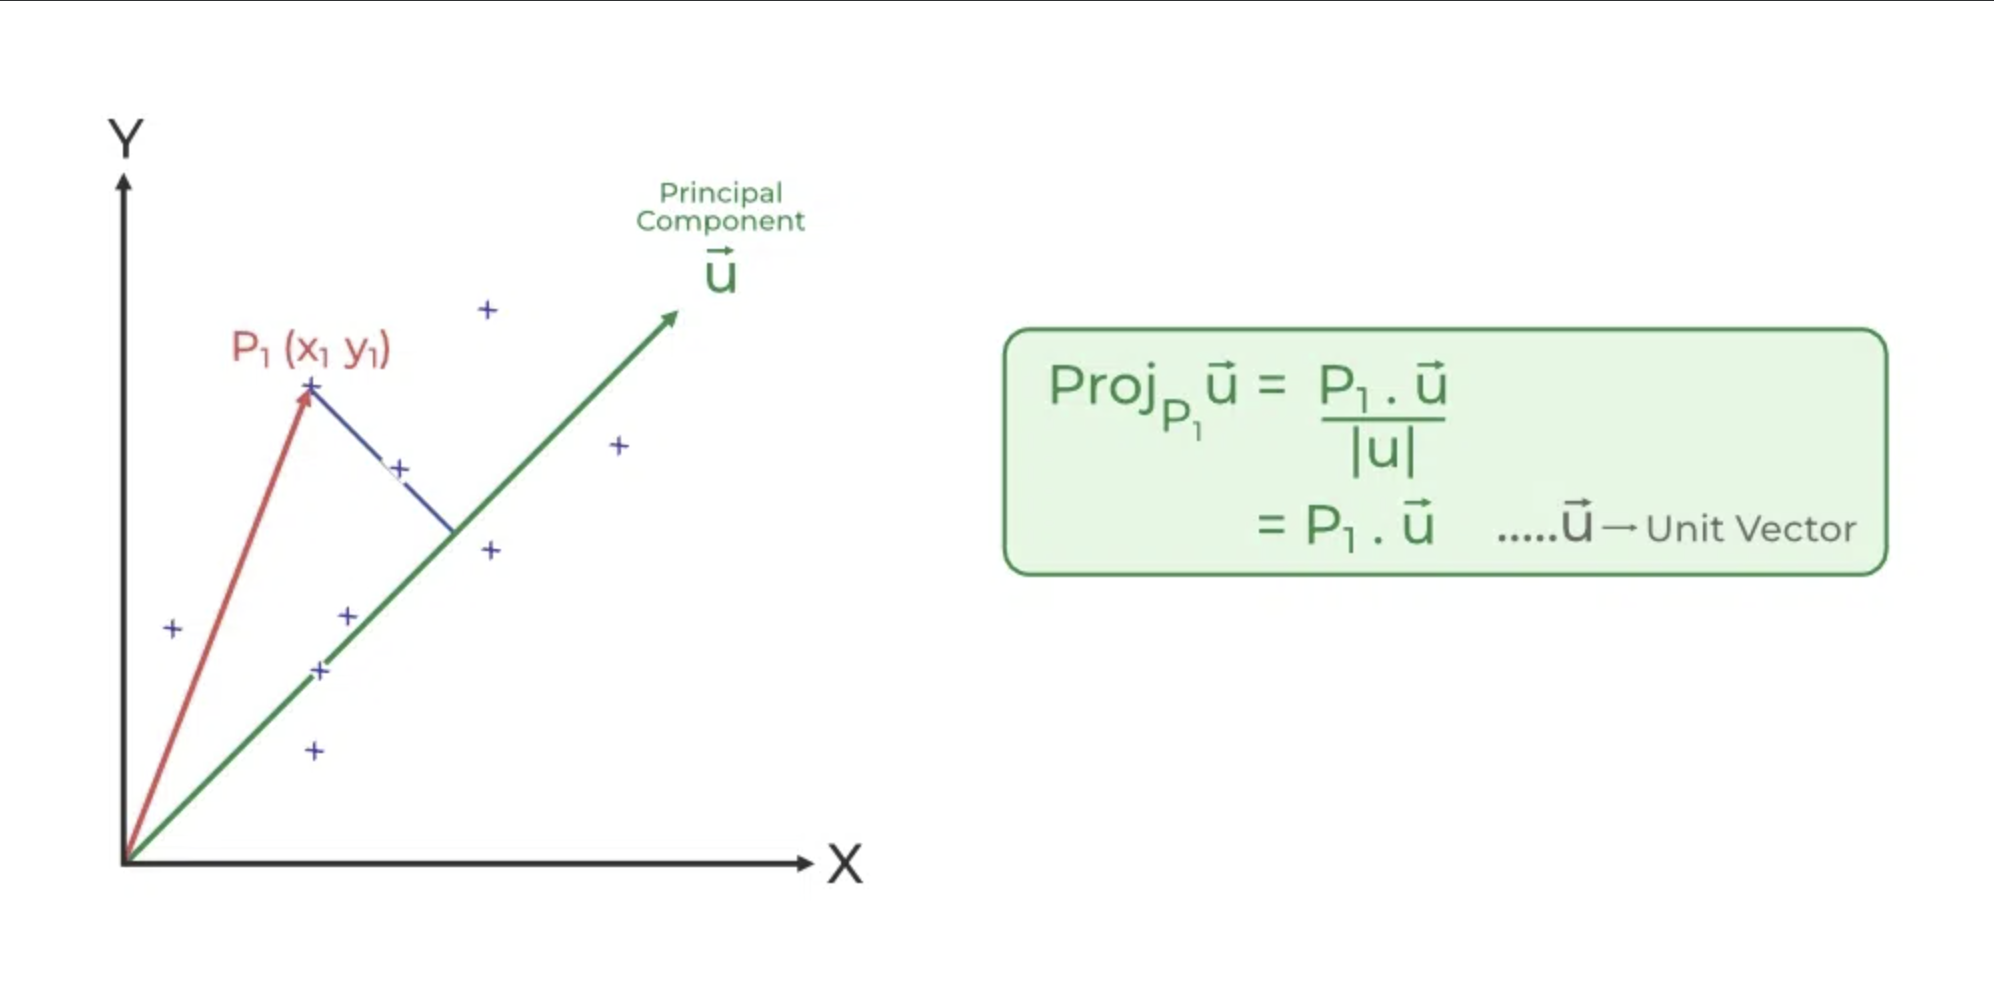

In [26]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)


          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components. Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.



#**PCA using Using Sklearn**

There are different libraries in which the whole process of the principal component analysis has been automated by implementing it in a package as a function and we just have to pass the number of principal components which we would like to have. Sklearn is one such library that can be used for the PCA as shown below.




In [27]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)


           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


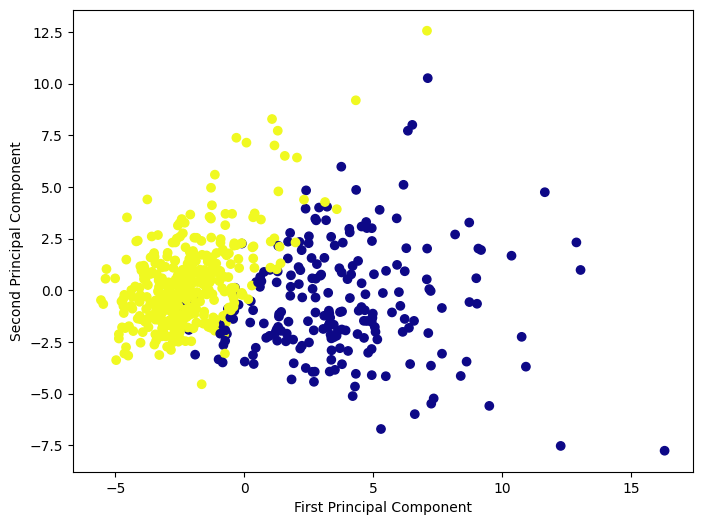

In [28]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=cancer['target'],
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [29]:
# components
pca.components_


array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

#**Well Done :)**
Now let's practice!